In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credits = pd.read_csv("tmdb-5000-movie-dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb-5000-movie-dataset/tmdb_5000_movies.csv")

In [3]:
credits.shape, movies.shape

((4803, 4), (4803, 20))

In [4]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
list(credits.columns)

['movie_id', 'title', 'cast', 'crew']

In [6]:
credits.columns = ['id', 'title', 'cast', 'crew']
movies.head(2) 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [7]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
# Rename column and merge tables
credits = credits.rename(columns={'movie_id': 'id'})
movies = movies.merge(credits, on='id')
movies = movies.drop(['title_y'], axis=1)
movies = movies.rename(columns={'title_x':'title'})
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Recommendation System 1: Using IMDB's weighted rating

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CCFEE6048>]], dtype=object)

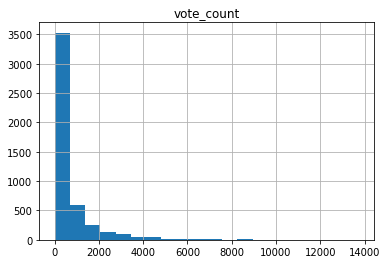

In [9]:
# Distribution of vote count in movies
movies.hist(column='vote_count', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CD0094B70>]], dtype=object)

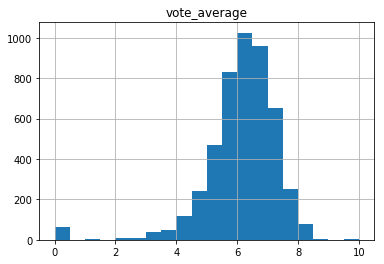

In [10]:
# Distribution of average votes in movies
movies.hist(column='vote_average', bins=20)

In [11]:
# Use 90th percentile as the cut off
m = movies['vote_count'].quantile(0.90)
m

1838.4000000000015

In [12]:
# Average movie vote 
C = movies['vote_average'].mean()
C

6.0921715594420158

In [13]:
q_movies = movies.copy().loc[movies['vote_count']>=m]
q_movies.shape

(481, 22)

In [14]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return v/(v+m)*R+m/(v+m)*C

In [15]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [16]:
# Sort movies based on above calculated score
q_movies = q_movies.sort_values('score', ascending=False)

In [17]:

q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


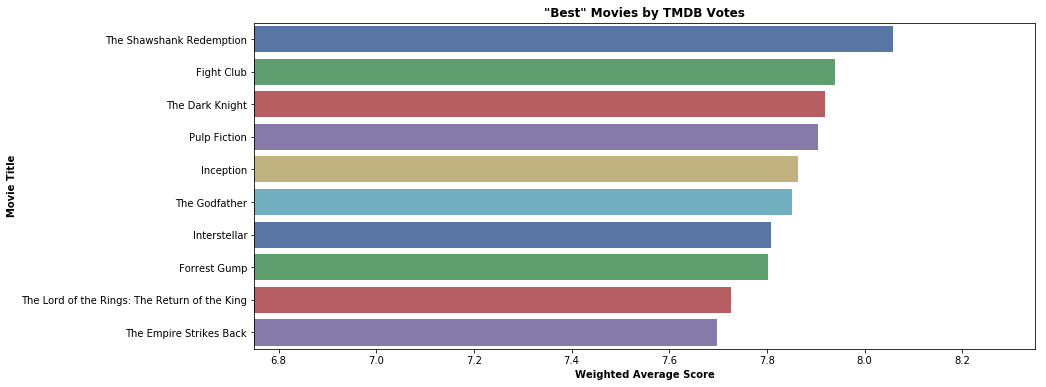

In [18]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=q_movies['score'].head(10), y=q_movies['original_title'].head(10), data=q_movies, palette='deep')
plt.xlim(6.75, 8.35)
plt.title('"Best" Movies by TMDB Votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

## Movie Recommendation Sysytem 2: Based on Popularity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CD03DADD8>]], dtype=object)

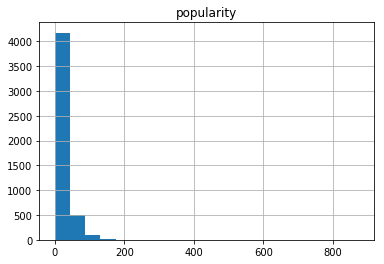

In [19]:
# Let us look at the movie popularity distribution
movies.hist(column='popularity', bins=20)

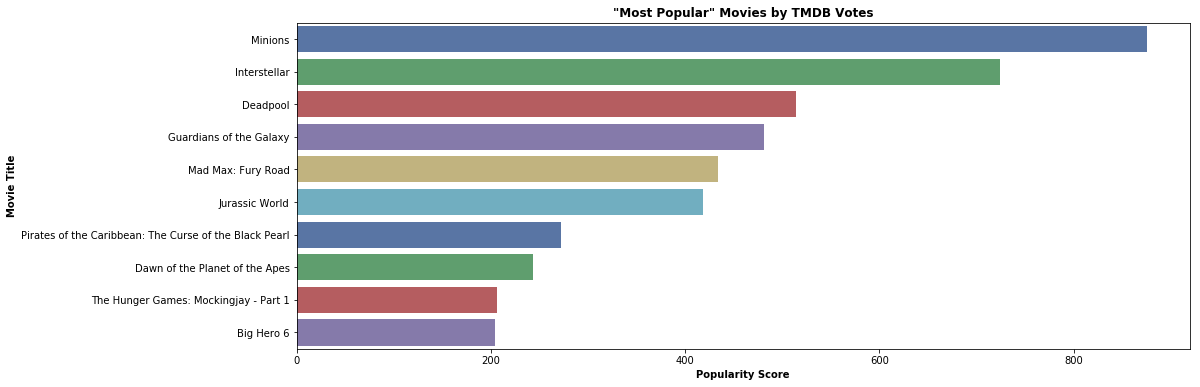

In [20]:
popular = q_movies.sort_values('popularity', ascending=False)
plt.figure(figsize=(16,6))
ax = sns.barplot(x=popular['popularity'].head(10), y=popular['original_title'].head(10), data=popular, palette='deep')
plt.title('"Most Popular" Movies by TMDB Votes', weight='bold')
plt.xlabel('Popularity Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('popular_movies.png')

## Movie Recommendation 3: Content Based Filtering

In this method, the content of the movies (overview, cast, crew, keyword, tagline etc) are used to find similarities with other movies. Then the movies most likely to be similar are recommended.  

We are going to use the **TF*IDF** on movie overview for this purpose.

Tern Frequency (TF) = relative frequency of a word in a document and is given as (term instances/total instances)

Inverse Document Frequency (IDF) = the relative count of documents containing the term given as log(number of documents/documents with term)

The overall importance of each word to the documents in which they appear is equal to **TF * IDF**.

In [21]:
# Movie oveview

movies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [22]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['overview'] = movies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

There are more than 20000 words that are used to describe more than 4800 movies.  
We will calculate the cosine similarities between the movies using linear kernel. 

In [23]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [24]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

We can now define recommendation function with the following steps:

* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [25]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [26]:
get_recommendations('The Shawshank Redemption')

4531               Civil Brand
3785                    Prison
609                Escape Plan
2868                  Fortress
4727              Penitentiary
1779    The 40 Year Old Virgin
2667          Fatal Attraction
3871         A Christmas Story
434           The Longest Yard
42                 Toy Story 3
Name: title, dtype: object

In [27]:
get_recommendations('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
2511                               Home Alone
3944                                  Freeway
2892                        Darling Companion
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
1733                        The Spy Next Door
70                             Wild Wild West
Name: title, dtype: object

This recommendtion system is doing a decent job. While it is based only on movie overview, we can improve it by including other meta data such as actors, directors, genres etc. So next is a movie recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords. 

In [28]:
# ast: abstract syntax tree
# Parse the strings in features to their corresponding python objects
from ast import literal_eval  
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

Below functions extract the required information from each feature:

In [29]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [30]:
# Returns the list of top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. 
        #If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [31]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [32]:
# Print the new features of the first 3 films
movies[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [33]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [34]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [35]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

movies['soup'] = movies.apply(create_soup, axis=1)

In [36]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,soup
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'gender': 0, 'department': 'Editing', 'credi...",jamescameron,cultureclash future spacewar samworthington zo...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'gender': 2, 'department': 'Camera', 'credit...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...


The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [37]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['soup'])

In [38]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [39]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

We can now reuse our get_recommendations() function by passing in the new cosine_sim2 matrix as your second argument.

In [40]:
get_recommendations('The Shawshank Redemption', cosine_sim2)

2609                                         Dark Blue
2818                                           Witness
4638                          Amidst the Devil's Wings
2926                                  Dead Man Walking
1283                               The Hudsucker Proxy
1663                       Once Upon a Time in America
1847                                        GoodFellas
1946    The Bad Lieutenant: Port of Call - New Orleans
2582                        The Place Beyond the Pines
3242                              Escape from Alcatraz
Name: title, dtype: object

In [41]:
get_recommendations('Minions', cosine_sim2)

67                                 Monsters vs Aliens
1426                                          Valiant
358                         Atlantis: The Lost Empire
302     Legend of the Guardians: The Owls of Ga'Hoole
2464                           The Master of Disguise
294                                              Epic
418       Cats & Dogs 2 : The Revenge of Kitty Galore
479                            Walking With Dinosaurs
1620                                  Winnie the Pooh
2823        Harold & Kumar Escape from Guantanamo Bay
Name: title, dtype: object

This recommender captures more information than just with movie overview.  
It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production companies as well.  
We can also increase the weight of the director , by adding the feature multiple times in the soup.


## Movie Recommendation 4: Collaborative filtering

In content based filtering, every user is going to get the same recommendation regardless of their preferance. Therefore we use **Collaborative Filtering** to recommend movies based on user preferances. They are of 2 types:

**1. User Based Filtering:** These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. To give an example, if user A likes movies X, Y and Z user B likes movies Y and Z then we can recommend movie X to B based on the fack that the users like similar movies. 

**2. Item Based Collaborative Filtering:** Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. 

### CF using SVD

One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.

ince the dataset used before did not have userId(which is necessary for collaborative filtering), we are going to use the Surprise library to implement SVD.

In [42]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [43]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [44]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

C:\Users\Manjit\Anaconda2\envs\py36\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Users\Manjit\Anaconda2\envs\py36\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8983
MAE:  0.6931
------------
Fold 2
RMSE: 0.8931
MAE:  0.6877
------------
Fold 3
RMSE: 0.8955
MAE:  0.6895
------------
Fold 4
RMSE: 0.9001
MAE:  0.6930
------------
Fold 5
RMSE: 0.8917
MAE:  0.6866
------------
------------
Mean RMSE: 0.8957
Mean MAE : 0.6900
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.69308197262456261,
                             0.68774687091886377,
                             0.68950486957939638,
                             0.69299586790835721,
                             0.68662320036947022],
                            'rmse': [0.89831427119533935,
                             0.89306895243860973,
                             0.89546645268482095,
                             0.90013160839517825,
                             0.89167444989264344]})

We get a mean Root Mean Sqaure Error of about 0.89 which is good enough. Let us now train on our dataset and arrive at predictions.

In [45]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 5 and check the ratings she/he has given:

In [46]:
ratings[ratings['userId'] == 5]

,userId,movieId,rating,timestamp
351,5,3,4.0,1163374957
352,5,39,4.0,1163374952
353,5,104,4.0,1163374639
354,5,141,4.0,1163374242
355,5,150,4.0,1163374404
356,5,231,3.5,1163373762
357,5,277,4.5,1163373208
358,5,344,3.5,1163373636
359,5,356,4.0,1163374152
360,5,364,4.0,1163373752


In [47]:
svd.predict(5, 302, 3)

Prediction(uid=5, iid=302, r_ui=3, est=3.9026278266063938, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of **3.903**. The great feature of this CF  recommender system is that it doesn't care what the movie is or what it contains. It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.